In [1]:
import pandas as pd

In [2]:
covishield = pd.read_csv("../data/India/vaccination/covishield.csv")
covishield.drop(columns = ["Datetime", "Username", "Tweet Id"], inplace = True)
covishield

,Text
0,Worn mask for way too much time which has made...
1,Date-11/02/2022\n\nTime - 9.00am to 5.00pm\n\n...
2,@EdzardErnst All who took covishield vaccine g...
3,SW delhi has at least 28102 new slots availabl...
4,@Thamizhan74 This is less safe I think- the Ja...
...,...
10956,बड़ी खबर : कोरोना वैक्सीन Covishield के लिए सी...
10957,सीरम इंस्टीट्यूट ने Covishield के आपात इस्तेमा...
10958,#Good_news\nSerum Institute seeks emergency us...
10959,UK is getting Pfizer's COVID-19 vaccine next w...


In [3]:
moderna = pd.read_csv("../data/India/vaccination/moderna.csv")
moderna.drop(columns = ["Datetime", "Username", "Tweet Id"], inplace = True)
moderna

,Text
0,UPST = 22 &gt; 401 &gt; 75 &gt; 78 ret\nROKU =...
1,@StraightTomCruz @watersofnun I'm sure moderna...
2,Canberra: Australia has provisionally approved...
3,Dr Fauci don’t take one step at a time… I woul...
4,@kacrn91 @GDujanovic Wonder how Moderna got th...
...,...
1821,@SanjayAzadSln Moderna vaccine overwhelmingly ...
1822,@ShashiTharoor Moderna vaccine overwhelmingly ...
1823,The talk of a vaccine was never so soothing. I...
1824,@moderna_tx @davletovuz Aksiyasini sotvoruvdim...


In [4]:
sputnik = pd.read_csv("../data/India/vaccination/sputnik.csv")
sputnik.drop(columns = ["Datetime", "Username", "Tweet Id"], inplace = True)
sputnik

,Text
0,@sputnik_TR @alibabacan her halde kendisini d...
1,@sputnik_TR Hem kullanıp hem de ödemiyoruz diy...
2,@sputnik_TR Tamam\nKaranlıkta birbirlerini düd...
3,@sputnik_TR HESler Nükleerler yapılmasın diye ...
4,"The week that was: Sputnik jab, PM-CARES, UP e..."
...,...
2328,Russian Ambassador to India Nikolay R.Kudashev...
2329,Dr Reddy's Laboratories and Russian Direct Inv...
2330,@sputnik_TR Konuş abla beee
2331,@GabbbarSingh Sputnik V list main kyon nahi ha...


In [25]:
astrazeneca = pd.read_csv("../data/India/vaccination/astrazeneca.csv")
astrazeneca.drop(columns = ["Datetime", "Username", "Tweet Id"], inplace = True)
astrazeneca

,Text
0,AstraZeneca sees $4B in COVID vaccine sales as...
1,"Covid Product Sales, Profit Margins Would Drop..."
2,"@JNJNews, @Roche, and @nvidia accounts for 52...."
3,AstraZeneca warns of falling Covid treatment s...
4,AstraZeneca forecasts higher 2022 sales after ...
...,...
4349,#SerumInstitute Seeks #DCGI Approval For Emerg...
4350,#Serum #Institute of #India ( #SII) in #Pune h...
4351,Anti-vaccine conspiracies will use this now to...
4352,Wonder how much it will cost for the governmen...


In [5]:
moderna_text_list = moderna['Text'].tolist()

moderna_text_list

['UPST = 22 &gt; 401 &gt; 75 &gt; 78 ret\nROKU = 80 &gt; 490 &gt; 140 &gt; 78 ret\nARKK = 33 &gt; 160 &gt; 64 &gt; almost .78 ret\nSNAP &gt; 7.9 &gt; 83 &gt; 78 ret\nModerna &gt; 11.5 &gt; 497 &gt; 138 &gt;between 61 &amp; 78 ret\nAmazon &gt; exact 50% ret\n\nhow many times i must hv said beware of stks with vertical rise.. trading is fine https://t.co/V6hGoW8m8L',
 "@StraightTomCruz @watersofnun I'm sure moderna can come up with an mrna shot that will alleviate the need to walk",
 'Canberra: Australia has provisionally approved the use of the AstraZeneca vaccine against Covid-19 as a booster shot for people aged 18 years and older. However, in its announcement the Therapeutic Goods Administration (TGA) said that Pfizer and Moderna’s mRNA vaccines remain the https://t.co/KBmqWxYFKl',
 'Dr Fauci don’t take one step at a time… I would suggest to take a giant leap and check weather the vaccine manufacturers like pfizer and moderna are providing real vaccines and not simply a random liquid

In [6]:
import numpy as np
import re

In [35]:
stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from", "vaccine", "astrazeneca", "vaccines","vaccinated","vaccination", "covid", "moderna", "sputnik", "Sputnik", "india", "covishield", "amp"]

def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    temp = tweet.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stopwords]
    temp = " ".join(word for word in temp)
    return temp

In [9]:
moderna_cleaned_tweets = [clean_tweet(tw) for tw in moderna_text_list]
moderna_cleaned_tweets

<ipython-input-7-57ce95c5ff1a>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tweet) == np.float:


['upst 22 gt 401 gt 75 gt 78 ret roku 80 gt 490 gt 140 gt 78 ret arkk 33 gt 160 gt 64 gt almost 78 ret snap gt 7 9 gt 83 gt 78 ret gt 11 5 gt 497 gt 138 gt between 61 78 ret amazon gt exact 50 ret how many times i must hv said beware stks with vertical rise trading is fine',
 'im sure can come up with mrna shot that will alleviate need walk',
 'canberra australia has provisionally approved use astrazeneca against 19 as booster shot people aged 18 years older however its announcement therapeutic goods administration tga said that pfizer s mrna remain',
 'dr fauci don t take one step at time i would suggest take giant leap check weather manufacturers like pfizer are providing real not simply random liquid my country people have developed immunity after 2 doses',
 'wonder how got money this',
 'question mark hangs over pfizer booster',
 'protection better maintained against severe 19 lancet study',
 'new tumblr post is astrazeneca booster safe if yes why uk recommending either pfizer or r

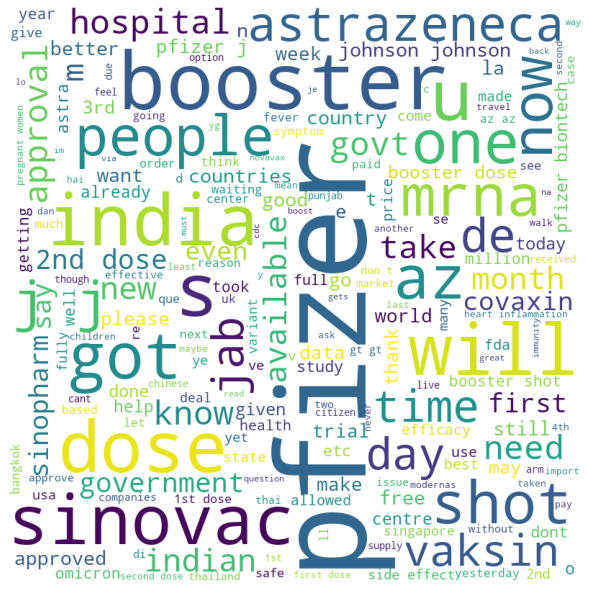

In [10]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''

# iterate through list
for tweet_text in moderna_cleaned_tweets:
    # split the text into tokens
    tokens = tweet_text.split()
    # Append tokens to string comment_words
    comment_words += " ".join(tokens)+" "
    
# Let's make a word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [11]:
covishield_text_list = covishield['Text'].tolist()

covishield_text_list

['Worn mask for way too much time which has made me vulnerable to other air borne diseases which upgrade themselves each year like #Apple iphone.\n\nLoss of air-borne diseases immunity, therefore Allergies.\n\nAfter 2 doses of #COVISHIELD and another #precautiondose can we unmask?',
 'Date-11/02/2022\n\nTime - 9.00am to 5.00pm\n\nAge group -18+\nOnspot\nCovishield\n1st dose -20\n2nd dose -20\nPrecaution Dose-60\n\nAge Group- 15+\nOnspot \nCovaxin\n1st dose-40\n2nd dose-20\nPrecaution Dose-40 https://t.co/LWGm9a7mBE',
 '@EdzardErnst All who took covishield vaccine got 2 and more times infection so what are you ranting about https://t.co/hB6wsRkBcq 😄',
 'SW delhi has at least 28102 new slots available between 10-02-22 &amp; 17-02-22.\n\nCovishield:\nDose1- 18+/45+:6975/0\nDose2- 18+/45+:5864/0\n\nCovaxin:\nDose1- 18+/45+:0/0\nDose2- 18+/45+:0/0\n\nBook one now at https://t.co/oN1Ae9XIlf #vaccine #cowin #covid #delhi',
 '@Thamizhan74 This is less safe I think- the Janssen Ad26.CoV2.S It i

In [12]:
covishield_cleaned_tweets = [clean_tweet(tw) for tw in covishield_text_list]
covishield_cleaned_tweets

<ipython-input-7-57ce95c5ff1a>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tweet) == np.float:


['worn mask way too much time which has made me vulnerable other air borne diseases which upgrade themselves each year like iphone loss air borne diseases immunity therefore allergies after 2 doses another can we unmask',
 'date 11 02 2022 time 9 00am 5 00pm age group 18 onspot 1st dose 20 2nd dose 20 precaution dose 60 age group 15 onspot covaxin 1st dose 40 2nd dose 20 precaution dose 40',
 'all who took got 2 more times infection so what are you ranting about',
 'sw delhi has at least 28102 new slots available between 10 02 22 17 02 22 dose1 18 45 6975 0 dose2 18 45 5864 0 covaxin dose1 18 45 0 0 dose2 18 45 0 0 book one now at',
 'this is less safe i think janssen ad26 cov2 s it is adenovirus like no you should not go compulsion it is counter productive',
 'this is less safe i think janssen ad26 cov2 s it is adenovirus like',
 'list countries released today which allows travel without rt pcr test doesnt have norway whereas norway recognizes now can we please think about adding this

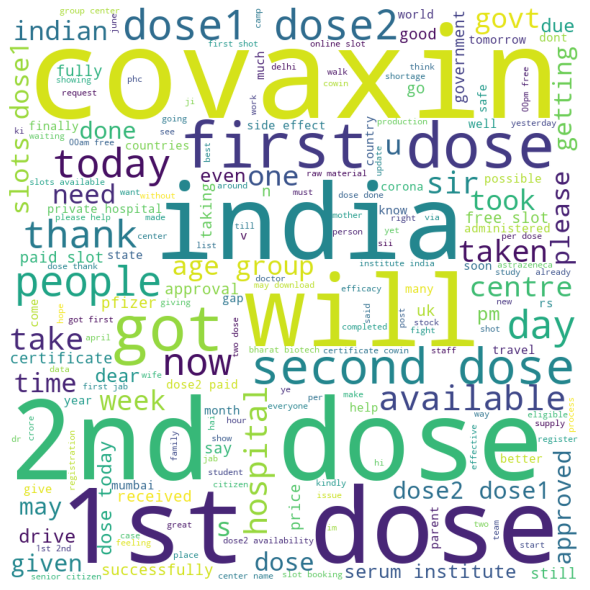

In [23]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
comment_words = ''

# iterate through list
for tweet_text in covishield_cleaned_tweets:
    # split the text into tokens
    tokens = tweet_text.split()
    # Append tokens to string comment_words
    comment_words += " ".join(tokens)+" "
    
# Let's make a word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [14]:
sputnik_text_list = sputnik['Text'].tolist()

sputnik_text_list

['@sputnik_TR @alibabacan  her halde kendisini dünyanın gelmiş geçmiş tek ekonomisti zannediyor ! \nDoğrudur , ekonomi anlamında başarlıdır elbet iyi yerlerde eğtim almıştır ama ülkenin bugünlere gelmesinin de temelini kendisi atmıştır !',
 '@sputnik_TR Hem kullanıp hem de ödemiyoruz diyen anarşistler görsün',
 '@sputnik_TR Tamam\nKaranlıkta birbirlerini düdüklesinler\nAlışkınlar nasıl olsa',
 '@sputnik_TR HESler Nükleerler yapılmasın diye engel olmaya çalışın\nSonra utanmadan ucuz elektrik isteriz diye bağırın\n\nTipik bir Cenabet Halk Partili davranışı',
 'The week that was: Sputnik jab, PM-CARES, UP election https://t.co/iYaJJmWMZt',
 'The week that was: Sputnik jab, PM-CARES, UP election #BJP #farmers #GautamAdani #InterGlobeAviation #MGNREGSSputnikjab #PMCaresFund #UPelection https://t.co/ToWclb8adr\nhttps://t.co/ToWclb8adr',
 '#Russia requested #Thailand for inclusion of Sputnik Light for #quanrantine #free program into Thailand but Thai authority insist not so rather than a #man

In [30]:
sputnik_cleaned_tweets = [clean_tweet(tw) for tw in sputnik_text_list]
sputnik_cleaned_tweets

<ipython-input-29-f962ea0294e9>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tweet) == np.float:


['her halde kendisini d nyan n gelmi ge mi tek ekonomisti zannediyor do rudur ekonomi anlam nda ba arl d r elbet iyi yerlerde e tim alm t r ama lkenin bug nlere gelmesinin de temelini kendisi atm t r',
 'hem kullan p hem de demiyoruz diyen anar istler g rs n',
 'tamam karanl kta birbirlerini d d klesinler al k nlar nas l olsa',
 'hesler n kleerler yap lmas n diye engel olmaya al n sonra utanmadan ucuz elektrik isteriz diye ba r n tipik bir cenabet halk partili davran',
 'week that was jab pm cares up election',
 'week that was jab pm cares up election',
 'requested inclusion light program into thailand but thai authority insist not so rather than 7 days quanrantine program limited places due lack documents',
 'kafirler ve hainlerin umudu bir ba ka bahara kald',
 'bs nam k syed hain pason k liye kuch b krty hain',
 '',
 'china calls us stop sanctioning north korea',
 'new axis nyt slams russia china not acting like us had few harsh words hitler s rise',
 'ce n est que une propaganda de 

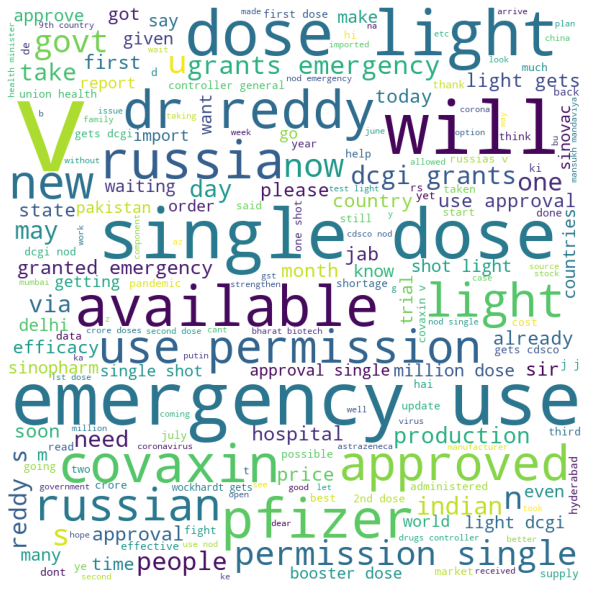

In [31]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
comment_words = ''

# iterate through list
for tweet_text in sputnik_cleaned_tweets:
    # split the text into tokens
    tokens = tweet_text.split()
    # Append tokens to string comment_words
    comment_words += " ".join(tokens)+" "
    
# Let's make a word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [36]:
astrazeneca_text_list = astrazeneca['Text'].tolist()

astrazeneca_text_list

['AstraZeneca sees $4B in COVID vaccine sales as revenue\xa0soars https://t.co/7dt84NfxPw',
 'Covid Product Sales, Profit Margins Would Drop This Year as Pandemic Recedes, Warns AstraZeneca\n\nhttps://t.co/VQbqxSQFUN',
 '@JNJNews, @Roche, and @nvidia accounts for 52.3% of the capitalization of all companies included. Despite the performance decline that @VertexPharma have had in the past year, it still ended up at the top. @AstraZeneca has raised its capitalization by more than 11 times, $186.7B https://t.co/006KsIdcuP',
 'AstraZeneca warns of falling Covid treatment sales after record year - https://t.co/OrMxJjRHX4 https://t.co/IK8vH0hPcr',
 'AstraZeneca forecasts higher 2022 sales after record revenues https://t.co/slyAiF6Na5',
 'AstraZeneca R&amp;D chiefs talk roxadustat trial, Ultomiris threats and Imfinzi wingman treme’s\xa0future https://t.co/LvkNxGsxt4',
 'AstraZeneca approved as booster vaccine in #Australia \nhttps://t.co/I0iQF5tfZB',
 'astrazeneca: AstraZeneca sees $4 billion

In [37]:
astrazeneca_cleaned_tweets = [clean_tweet(tw) for tw in astrazeneca_text_list]
astrazeneca_cleaned_tweets

<ipython-input-35-99094ad91720>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tweet) == np.float:


['sees 4b sales as revenue soars',
 'product sales profit margins would drop this year as pandemic recedes warns',
 'accounts 52 3 capitalization all companies included despite performance decline that have had past year it still ended up at top has raised its capitalization by more than 11 times 186 7b',
 'warns falling treatment sales after record year',
 'forecasts higher 2022 sales after record revenues',
 'r d chiefs talk roxadustat trial ultomiris threats imfinzi wingman treme s future',
 'approved as booster',
 'sees 4 billion sales as revenue soars',
 'sees higher 2022 sales even as boost wanes',
 's sales reached 4b last year but don t expect that much 2022',
 'approved as booster australia',
 'sees 4b sales as revenue soars',
 'sees higher 2022 sales even as boost wanes',
 'sees 4 billion sales as revenue soars times',
 'would recommend you contact it will be available there but you need valid prescription authorized by oncologist at tmh if feasible go your second option whic

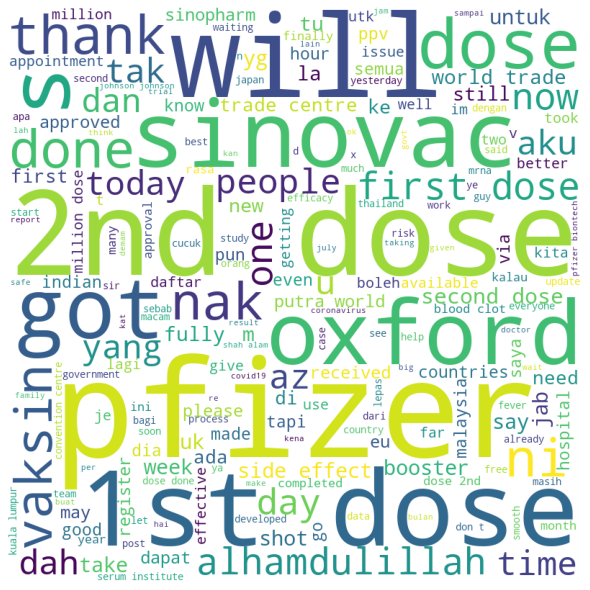

In [38]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''

# iterate through list
for tweet_text in astrazeneca_cleaned_tweets:
    # split the text into tokens
    tokens = tweet_text.split()
    # Append tokens to string comment_words
    comment_words += " ".join(tokens)+" "
    
# Let's make a word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()